In [381]:
import cv2 as cv
import os
import numpy as np
import math
import matplotlib.pyplot as plt

In [382]:
path_pic = "D:/Projects/EasyLabel/data_test/TEMP_DIR/_temp.jpg"
path_lab_pic = "D:/Projects/EasyLabel/data_test/TEMP_DIR/temp.jpg"
path_labs = "D:/Projects/EasyLabel/data_test/TEMP_DIR/Labels.txt"
path_save = "D:/Projects/EasyLabel/data_test/TEMP_DIR/"

labled_colors = []
NAME_labels = []
BGR_labels = None
#READING LABEL FILE AND GETTING LABELS AND COLORS
#['LABEL',b,g,r]
with open(path_labs, 'r') as f:
        lines = f.readlines()
        for line in lines:
            l = line.strip().split(',')
            ls = [l[0],int(l[1]),int(l[2]),int(l[3])]
            labled_colors.append(ls)
        BGR_labels = np.zeros((len(labled_colors),3))
y = 0
# ORGANIZE DATA np ARRAY list of LAbel NAMES
for x in labled_colors:
    NAME_labels.append(x[0])
    BGR_labels[y,0] = x[1]
    BGR_labels[y,1] = x[2]
    BGR_labels[y,2] = x[3]
    y = y + 1
BGR_labels = BGR_labels.astype(dtype=np.uint8)
print(NAME_labels)
print(BGR_labels)

['2', '4', '1', '3', 'ONE', 'TWO', 'THREE', 'FOUR']
[[205 250 255]
 [193 205 193]
 [  0 139 139]
 [ 96 164 244]
 [170 205 102]
 [139   0   0]
 [194 194 194]
 [211 211 211]]


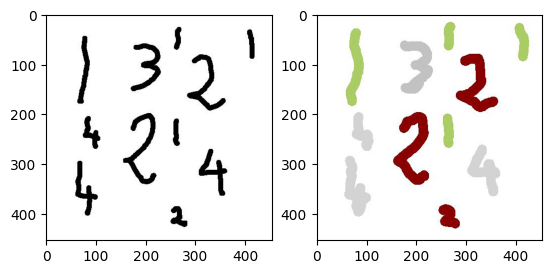

In [383]:
fig, (ax1, ax2) = plt.subplots(1,2)

img = cv.imread(path_pic)
lab_img = cv.imread(path_lab_pic)
ax1.imshow(img)
ax2.imshow(lab_img)
#plt.imshow(lab_img)

FOUR
(454, 454, 3)
5205


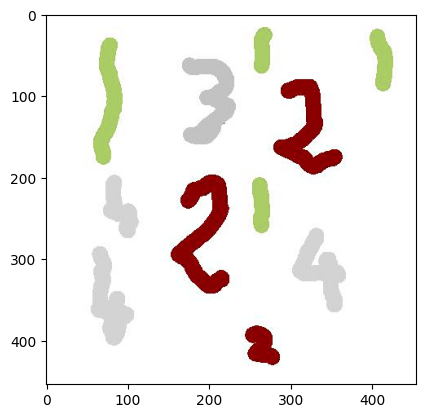

In [384]:
y = 7
x = BGR_labels[y]
print(NAME_labels[y])
# Find all pixels where the 3 NoTE ** BGR not RGB  values match "sought", and count
result = np.count_nonzero(np.all(lab_img==x,axis=2))
plt.imshow(lab_img)
print(lab_img.shape)
(width,height,chanels) = lab_img_BGR.shape
print(result)
color_img = np.zeros([width,height,chanels], dtype=np.uint8)
color_img[:] = x


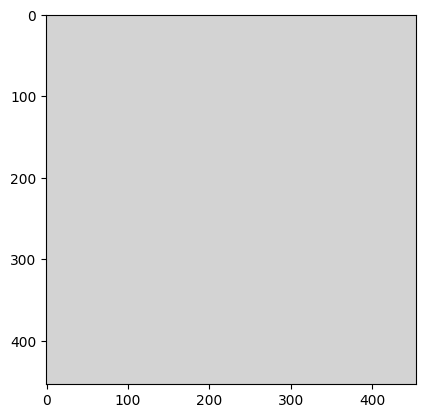

In [385]:
plt.imshow(color_img)

In [386]:
def getRanges(color,dif):
    range1 = np.array([color[0], color[1], color[2]])
    range2 = np.array([color[0], color[1], color[2]])

    for i in range(3):
        reminder = 0
        if color[i] > dif & color[i] < (254 - dif):
            range1[i] = color[i] - dif
            range2[i] = color[i] + dif
        elif color[i] < dif:
            reminder = (color[i] - dif) * (-1)
            range1[i] = 0
            range2[i] = color[i] + dif + reminder
        elif color[i] > (254 - dif):
            reminder = (254 - color[i] - dif) * (-1)
            range1[i] = color[i] - dif - reminder
            range2[i] = 255 

    print(color)
    print(range1)
    print(range2)
    return range1, range2
getRanges(x, 10)

    

[211 211 211]
[201 201 201]
[221 221 221]


(array([201, 201, 201], dtype=uint8), array([221, 221, 221], dtype=uint8))

[211 211 211]
[201 201 201]
[221 221 221]
(454, 454)


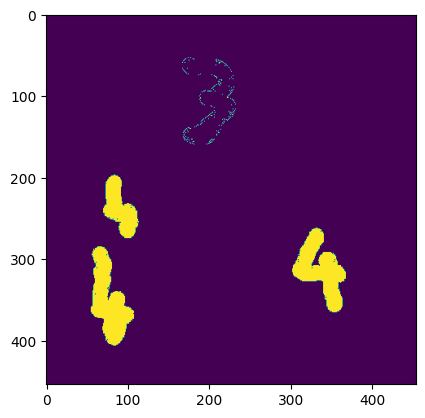

In [387]:
x1, x2 = getRanges(x, 10)
mask = cv.inRange(lab_img,x1,x2)
plt.imshow(mask)
print(mask.shape)

(454, 454)


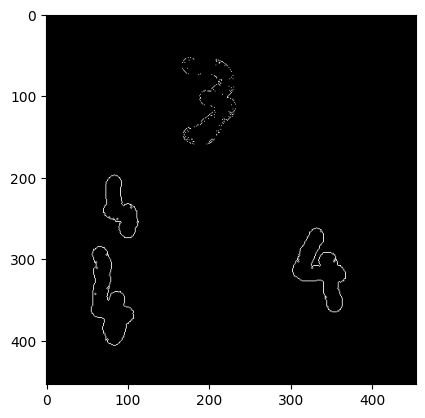

In [388]:
conts, h = cv.findContours(image=mask, mode=cv.RETR_TREE, method= cv.CHAIN_APPROX_NONE)
conturs = np.zeros(mask.shape)
cv.drawContours(image=conturs, contours=conts, contourIdx=-1, color=(255))
plt.imshow(conturs, 'gray')
print(conturs.shape)

In [389]:
def get_threshold_size(shape, proc):
    (x,y) = shape
    out = (x * y) * (proc/100)
    return(int(out))
    

print(conturs.shape[0]* conturs.shape[1]) 
th = get_threshold_size(conturs.shape, 0.05)
print(th)
     

206116
103


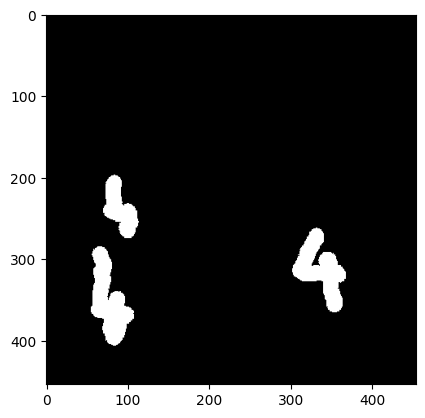

In [390]:
conturs1 = np.zeros(mask.shape)
c2 = np.zeros(mask.shape)
da = False
for _,c in enumerate(conts):
    if cv.contourArea(c) > th:
        cv.drawContours(conturs1,[c], 0,(255), -1)
        x,y,w,h = cv.boundingRect(c)
        #conturs1 = cv.rectangle(conturs1,(x,y),(x+w, y+h), (255), -1)
        if da == False:
            da = True
            c2 = img[y:y+h, x:x+w] 

plt.imshow(conturs1, 'gray')

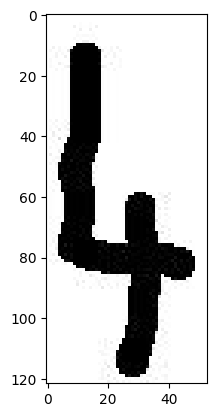

In [391]:
plt.imshow(c2, 'gray')

In [392]:
cv.imwrite(path_save + 'kappa.jpg', c2)

True